In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', encoding='windows-1251')

In [3]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', encoding='windows-1251')

In [24]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [25]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
user_data.shape

(2954, 3)

In [7]:
logs.shape

(4500, 4)

In [11]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [12]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [26]:
logs['platform'].unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [26]:
most_successful_operations = logs.query('success == True').groupby('client').agg({'success': 'count'}).sort_values('success', ascending=False).query('success == 41')

In [28]:
most_successful_operations.sort_values('client')

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


In [42]:
most_popular_platform = logs.query('success == True').groupby('platform', as_index=False).agg({'success': 'count'}).sort_values('success', ascending=False).rename(columns={'success': 'success_count'})

In [43]:
most_popular_platform

,platform,success_count
1,phone,2019
0,computer,1090
2,tablet,180


In [21]:
merged = logs.merge(user_data, on='client')

In [18]:
most_popular_premium = merged.query('premium == True').groupby('platform', as_index=False).agg({'client': 'count'}).sort_values('client', ascending=False)

In [19]:
most_popular_premium

,platform,client
1,phone,246
0,computer,150
2,tablet,24


In [51]:
users_ages = merged.groupby('premium').age.value_counts(normalize=True)   

In [52]:
users_ages

premium  age
False    28     0.043392
         25     0.034448
         68     0.032461
         49     0.031799
         52     0.031467
                  ...   
True     45     0.011905
         56     0.011905
         55     0.009524
         48     0.007143
         63     0.004762
Name: age, Length: 100, dtype: float64

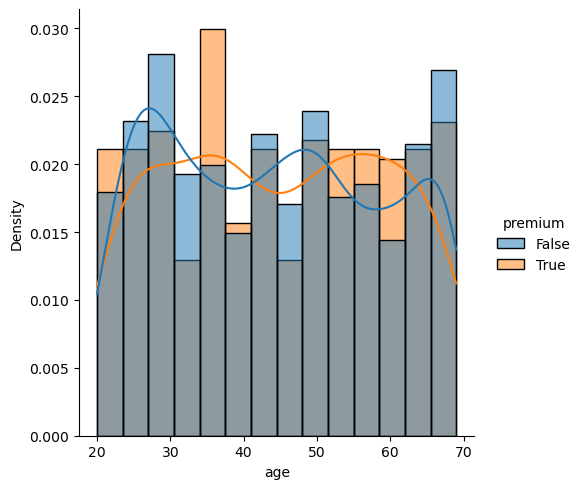

In [68]:
ax = sns.displot(data = merged, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False, bins=14)

In [11]:
amount_of_success_operations = logs.query('success == True').groupby('client', as_index=False).agg({'success': 'count'})   

In [12]:
amount_of_success_operations

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


In [17]:
success_operations_by_people = amount_of_success_operations['success'].value_counts().reset_index()

In [18]:
success_operations_by_people

,index,success
0,1,2791
1,2,43
2,41,9
3,40,1
4,3,1


[Text(0.5, 0, 'Amount of success operations'),
 Text(0, 0.5, 'Amount of people')]

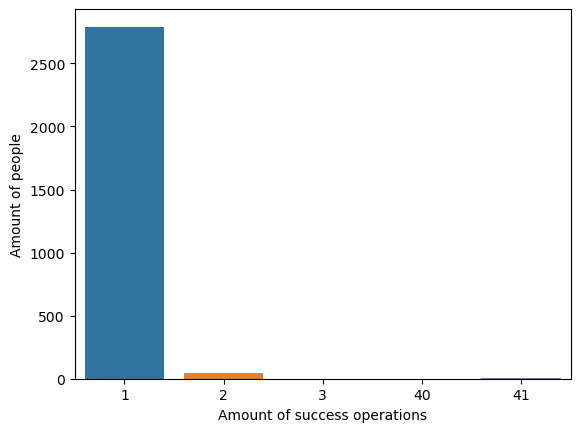

In [19]:
ax = sns.barplot(x='index', y='success', data=success_operations_by_people)
ax.set(xlabel='Amount of success operations', ylabel='Amount of people')

In [22]:
merged

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [35]:
success_by_computer = merged.query('success == True').query('platform == "computer"')   

In [36]:
success_by_computer

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


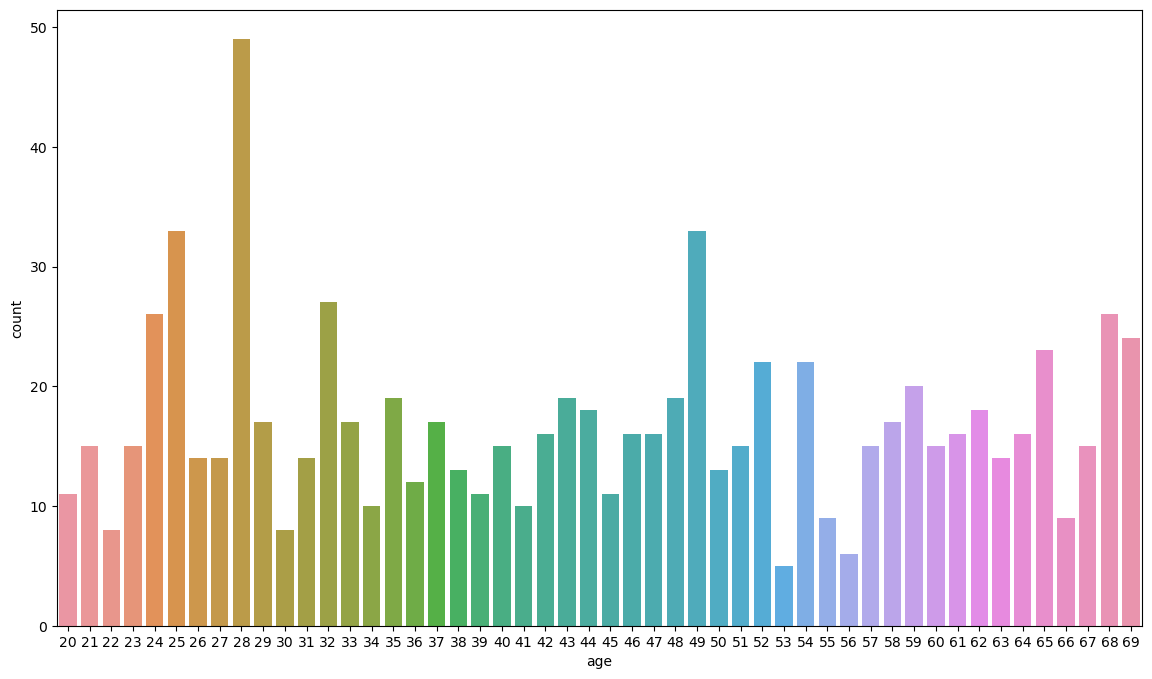

In [40]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=success_by_computer, x='age')